# Semi Empirical Mass Formula - Bethe Weizsacker Formula

$$ BE = a_v A -a_S A^{2/3} -a_c \frac{Z(Z-1)}{A^{1/3}} -a_{Sym} \frac{(N-Z)^2}{A} + E_P $$
where the pairing term is;

$$ E_P = -\frac{a_P}{A^{3/4}} \quad; \quad for \, odd \, N - odd \, Z \, nuclei $$
$$ = \frac{a_P}{A^{3/4}} \quad; \quad for \, even \, N - even \, Z \, nuclei $$
$$ = 0 \quad; \quad for \, odd \, A \, nuclei $$

Modules to import

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as so
so.set_style('whitegrid')
import plotly.express as px
import scipy.constants as const

In [3]:
u = 931.494091  # in MeV
# u = 931
aV = 16.919e-3*u
aS = 19.114e-3*u
aC = 0.7626e-3*u
aSym = 25.44e-3*u
aP = 36e-3*u

In [4]:
def binding_energy_volume(A):
    return aV*A
def binding_energy_surface(A):
    return -aS*A**(2/3)
def binding_energy_coulomb(Z, A):
    return -aC*Z*(Z-1)/A**(1/3)
def binding_energy_asym(Z, A):
    return -aSym*((A-2*Z)**2)/A

def binding_energy_pairing(Z, A):
    if A%2 == 1:
        Ep = 0
    elif Z%2 == 1:
        Ep = -aP/A**(3/4)
    elif Z%2 == 0:
        Ep = aP/A**(3/4)
    else:
        Ep = 0
    return Ep

def binding_energy(Z, A):
    return (binding_energy_volume(A)+binding_energy_surface(A)+binding_energy_coulomb(Z,A)
            +binding_energy_asym(Z,A)+binding_energy_pairing(Z,A))

In [5]:
Z = 80
A = 200
binding_energy(Z, A)/A

7.932239578771319

User given data

,Z,A,BE_V,BE_S,BE_C,BE_Sym,BE_P,BE,BE/A
0,2,4,63.039794,-44.864725,-0.894994,-0.000000,11.855984,29.136059,7.284015
1,3,6,94.559691,-58.789421,-2.345548,-0.000000,-8.747202,24.677519,4.112920
2,5,10,157.599485,-82.641531,-6.594374,-0.000000,-5.963244,62.400336,6.240034
3,6,12,189.119382,-93.322389,-9.308315,-0.000000,5.201118,91.689795,7.640816
4,7,14,220.639279,-103.422979,-12.378942,-0.000000,-4.633259,100.204100,7.157436
5,8,16,252.159176,-113.052024,-15.786709,-0.000000,4.191723,127.512167,7.969510
6,9,18,283.679073,-122.286924,-19.515749,-0.000000,-3.837322,138.039078,7.668838
7,10,20,315.198971,-131.185253,-23.552811,-0.000000,3.545766,164.006673,8.200334
8,11,23,362.478816,-143.995939,-27.476430,-1.030313,0.000000,189.976133,8.259832
9,24,50,787.997426,-241.645302,-106.437006,-1.895777,1.783426,439.802768,8.796055


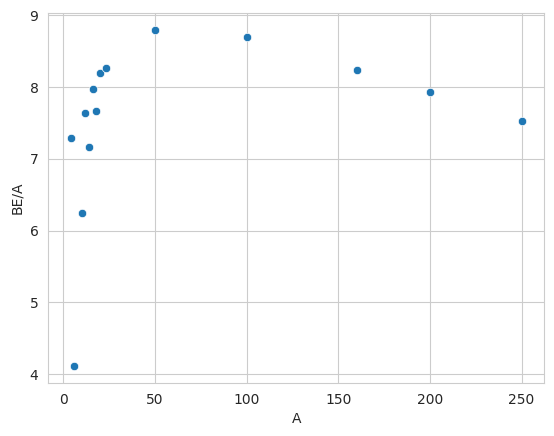

In [11]:
Z_X_A = [[2,4], [3,6], [5,10], [6,12], [7,14], [8,16], [9,18], [10,20], [11,23], [24,50],
        [44,100], [64,160], [80,200], [100, 250]]    # INPUT

Zs = np.array(Z_X_A).T[0]
As = np.array(Z_X_A).T[1]

BEvs = np.array([binding_energy_volume(Ai) for Ai in As])
BEss = np.array([binding_energy_surface(Ai) for Ai in As])
BEcs = np.array([binding_energy_coulomb(Zi, Ai) for Zi, Ai in Z_X_A])
BEsys = np.array([binding_energy_asym(Zi, Ai) for Zi, Ai in Z_X_A])
BEps = np.array([binding_energy_pairing(Zi, Ai) for Zi, Ai in Z_X_A])
BEs = np.array([binding_energy(Zi, Ai) for Zi, Ai in Z_X_A])
BEs_per_A = np.array([binding_energy(Zi, Ai)/Ai for Zi, Ai in Z_X_A])

df1 = pd.DataFrame({'Z':Zs, 'A':As, 'BE_V':BEvs,'BE_S':BEss,'BE_C':BEcs,'BE_Sym':BEsys,'BE_P':BEps,
                    'BE':BEs, 'BE/A':BEs_per_A})
display(df1)
fig = px.scatter(df1, x='A', y='BE/A', hover_data='Z', title='Calculated using Semi empirical mass formula')
# fig = px.line(df1, x='A', y='BE/A', hover_data='Z', title='Calculated using Semi empirical mass formula')
fig.show()

so.scatterplot(x='A', y='BE/A', data=df1)
plt.show()

Imported data from excel sheet

,N,Z,halflife(Seconds)
0,1,1,STABLE
1,2,1,388789632
2,4,1,7.994736842105262e-23
3,5,1,2.8481249999999997e-22
4,1,2,STABLE


<Axes: xlabel='Z', ylabel='N'>

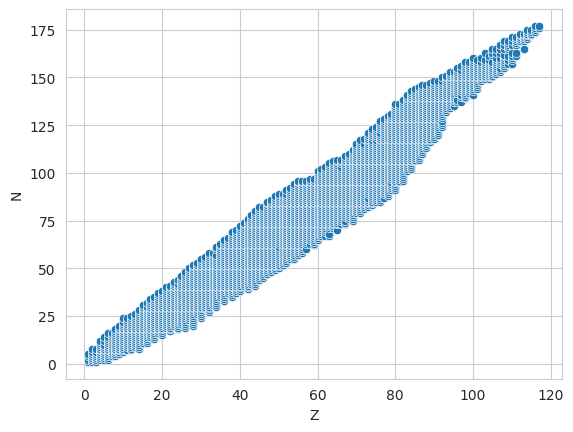

In [12]:
df2 = pd.read_csv('nndc_nudat_data_export_z_n_t.csv')
display(df2.head())

fig2 = px.scatter(df2, x='Z', y='N', hover_name='halflife(Seconds)',
                title='Calculated using Semi empirical mass formula')
fig2.show()

so.scatterplot(df2, x='Z', y='N')
plt.show()

,Z,A,BE_V,BE_S,BE_C,BE_Sym,BE_P,BE,BE/A
0,1,2,31.519897,-28.263006,-0.000000,-0.000000,-19.939309,-16.682418,-8.341209
1,1,3,47.279846,-37.035015,-0.000000,-7.899070,0.000000,2.345761,0.781920
2,1,5,78.799743,-52.060902,-0.000000,-42.654977,0.000000,-15.916137,-3.183227
3,1,6,94.559691,-58.789421,-0.000000,-63.192559,-8.747202,-36.169492,-6.028249
4,2,3,47.279846,-37.035015,-0.985069,-7.899070,0.000000,1.360692,0.453564


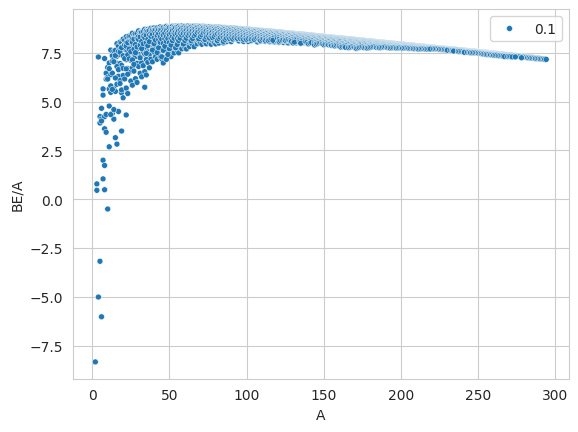

In [18]:
Zs = df2['Z'].to_numpy()
Ns = df2['N'].to_numpy()
As = Zs + Ns
Z_X_A = np.array([list(Zs), list(As)]).T

BEvs = np.array([binding_energy_volume(Ai) for Ai in As])
BEss = np.array([binding_energy_surface(Ai) for Ai in As])
BEcs = np.array([binding_energy_coulomb(Zi, Ai) for Zi, Ai in Z_X_A])
BEsys = np.array([binding_energy_asym(Zi, Ai) for Zi, Ai in Z_X_A])
BEps = np.array([binding_energy_pairing(Zi, Ai) for Zi, Ai in Z_X_A])
BEs = np.array([binding_energy(Zi, Ai) for Zi, Ai in Z_X_A])
BEs_per_A = np.array([binding_energy(Zi, Ai)/Ai for Zi, Ai in Z_X_A])

df1 = pd.DataFrame({'Z':Zs, 'A':As, 'BE_V':BEvs,'BE_S':BEss,'BE_C':BEcs,
                'BE_Sym':BEsys,'BE_P':BEps, 'BE':BEs, 'BE/A':BEs_per_A})
display(df1.head())
fig1 = px.scatter(df1, x='A', y='BE/A', hover_data='Z', 
                title='Calculated using Semi empirical mass formula')
fig1.show()

so.scatterplot(df1, x='A', y='BE/A', size=0.1)
plt.show()